# PROYECTO MIT ()

**Importacion de librerias**

In [16]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
import mpl_toolkits
%matplotlib inline
import statsmodels.formula.api as sfm 
from pandas.plotting import scatter_matrix 
import matplotlib.pyplot as plt
import plotnine as p9

In [17]:
url='https://raw.githubusercontent.com/MFigueroa-A/Archivo-CSV/main/nodemcu_1.csv' #irrigacion
newb = pd.read_csv(url)

## Comprension del negocio



1. Establecer objetivos de negocio: El proyecto “MIT” busca ser una ayuda en el desafío por mejorar la gestión hídrica y así disminuir el costo del uso de agua en el sector de la agricultura, que se requiere en el norte del país, por medio de una solución tecnológica que incorpora  TIC, Minería de datos e IOT.
imagen de estudio ciper

2. Evaluar situación actual: Uno de los problemas que preocupa al mundo entero es la crisis hídrica, en especial a Chile que actualmente lidera en América latina en esta problemática, esto debido a el problema estructural de gestión del agua, junto a la crisis climática crean un panorama alarmante. El norte grande del país es el más afectado , en especial la agricultura, según datos del banco mundial en esta actividad se ocupa el 70% del agua que se extrae en el mundo. Las plantaciones en esta zona del país son las que más sufren estrés hídrico ( Def .Cuando la demanda de agua es más importante que la cantidad disponible durante un periodo determinado ) siendo de suma importancia mejorar la gestión en ahorro y uso eficiente del agua tal como recomienda la ONU. 

3. Fijar objetivos a nivel de minería de datos: Para cumplir con el objetivo antes dicho se utilizará un dataset, el cual con los datos ya ingresados se emplea una técnica de  Data Mining para lograr predecir, según un modelo, cuando es necesario realizar el riego a una plantación o planta, mejorando así la gestión y eficiencia en el uso del agua. 

  Como objetivo principal es predecir la humedad para poder encontrar los niveles más bajos recomendados para la planta y así evitar el estrés hídrico.



## Compresion de los datos


-familiarizarse con los datos (origen, cómo llegan, estructura, propiedades, inconvenientes que presentan y cómo mitigarlos o eliminarlos. Fase crítica por trabajar con la calidad de los datos (materia prima par DM). Esta fase considera:

**1. Ejecutar procesos de captura de datos**



Durante la ejecución de procesos de captura de datos, el dataset recibirá datos de la temperatura y humedad del ambiente; ademas, los datos del tiempo a través del modulo RTC;y la humedad bajo tierra, esto mediante el uso de dos sensores que estarán conectados con el nodeMCU, los cuales son:

• Sensor de temperatura y humedad ambiente

• Sensor de humedad bajo suelo

• Modulo del tiempo

**2. Describir el conjunto de datos**

Diccionario de datos

1. Moisture: Está relacionada con el contenido de agua (agua en estado líquido)
2. Temperature (C): Temperatura ambiental 
3. Humidity (%):Humedad ambiental.
4. Time : Tiempo real de la captura de los datos



In [18]:
newb.head(5) 

,id,temperature,humidity,moisture,date
0,1,18.5,61,714,2022-07-12 03:41:02
1,2,18.3,61,687,2022-07-12 03:41:32
2,3,17.9,61,684,2022-07-12 03:42:02
3,4,17.7,61,680,2022-07-12 03:42:32
4,5,17.2,63,667,2022-07-12 03:43:08


Esta función devuelve las primeras 5 filas de "newb" según la posición

In [19]:
newb.shape 

(1404, 5)

Esta funcion muestra las "1404" registros y las "5" caracteristicas de "newb"

**3. Realizar exploración de los datos**

In [20]:
newb.describe()

,id,temperature,humidity,moisture
count,1404.000000,1404.000000,1404.000000,1404.000000
mean,703.121083,16.209758,73.881054,679.664530
std,405.852051,0.872677,2.502335,20.503516
min,1.000000,13.900000,61.000000,618.000000
25%,351.750000,16.000000,72.000000,675.000000
50%,703.500000,16.200000,74.000000,680.000000
75%,1054.250000,16.900000,75.000000,690.000000
max,1405.000000,18.500000,83.000000,741.000000


Esta funcion muestra las medidas estaditicas de todo el dataset "newb"

In [21]:
newb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1404 entries, 0 to 1403
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1404 non-null   int64  
 1   temperature  1404 non-null   float64
 2   humidity     1404 non-null   int64  
 3   moisture     1404 non-null   int64  
 4   date         1404 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 55.0+ KB


Esta funcion muestra el tipo de variable de las "5" caracteristicas y la memoria usada

**4. Gestionar la calidad de los datos (identificar problemas y cómo solucionarlos)**

La calidad de datos de “newb” según nuestra actitud selectiva, tiene una calidad de caracteristicas precisas, ya que consta de "4" caracteristicas claves o relevantes para el objetivo de la mineria de datos;  Mientras que en credibilidad y fiabilidad tiene un nivel alto debido a que los datos estan proporcionados a tiempo real mediante tecnologia Iot en las plantas o plantaciones de la zona norte de chile; En cuanto a la calidad de comunicabilidad, se puede decir que si la posee, debido a que los datos se transmite por archivo csv, siendo estos fácilmente manejables; y por otra parte, a nivel de detalle,se estipula que se solucionara con el uso de la tecnología Iot (nodeMCU) actualizando así los datos. 


## Preparacion de los datos


1. Establecer universo de datos

In [22]:
newb=newb.iloc[0:800]
newb.shape

(800, 5)


 2. Realizar tareas de limpieza de datos

No se realizo una limpieza de datos, ya que se verifico anteriormente que no hay datos nulos o no existentes en el dataset.

3. Construir juego de datos apto para usar con DM

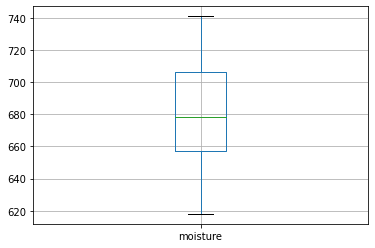

In [23]:
newb.boxplot(column="moisture");

In [24]:
Q1=newb["moisture"].quantile(0.25)
print("primer Cuartil",Q1)
Q3=newb["moisture"].quantile(0.75)
print("tercer Cuartil",Q3)
Mediana=newb["moisture"].median()
print("mediana es",Mediana)
Valor_minimo=newb["moisture"].min()
print("valor minimo:",Valor_minimo)
Valor_maximo=newb["moisture"].max()
print("valor maximo:",Valor_maximo)

primer Cuartil 657.0
tercer Cuartil 706.0
mediana es 678.0
valor minimo: 618
valor maximo: 741


Se puede observar que la mediana se esta acercando mas al primer quartil, por lo que se puede decir que es una asimetrica positiva, es decir, que la moda es menor a la mediana y la mediana es menor a la media.

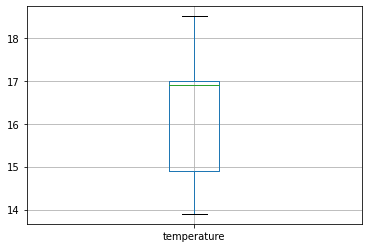

In [25]:
newb.boxplot(column="temperature");

In [26]:
Q1=newb["temperature"].quantile(0.25)
print("primer Cuartil",Q1)
Q3=newb["temperature"].quantile(0.75)
print("tercer Cuartil",Q3)
Mediana=newb["temperature"].median()
print("mediana es",Mediana)
Valor_minimo=newb["temperature"].min()
print("valor minimo:",Valor_minimo)
Valor_maximo=newb["temperature"].max()
print("valor maximo:",Valor_maximo)

primer Cuartil 14.9
tercer Cuartil 17.0
mediana es 16.9
valor minimo: 13.9
valor maximo: 18.5


Se puede observar que la mediana esta mas cerca del quartil 3, por lo que se puede decir, que es una asimetrica negativa, es decir que la moda es mayor a la mediana y la mediana es mayor a la media.

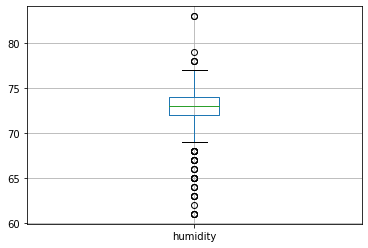

In [27]:
newb.boxplot(column="humidity");

In [28]:
Q1=newb["humidity"].quantile(0.25)
print("primer Cuartil",Q1)
Q3=newb["humidity"].quantile(0.75)
print("tercer Cuartil",Q3)
Mediana=newb["humidity"].median()
print("mediana es",Mediana)
Valor_minimo=newb["humidity"].min()
print("valor minimo:",Valor_minimo)
Valor_maximo=newb["humidity"].max()
print("valor maximo:",Valor_maximo)

primer Cuartil 72.0
tercer Cuartil 74.0
mediana es 73.0
valor minimo: 61
valor maximo: 83


Se puede observar que la mediana esta en el centro de la caja y los 'bigotes' son iguales, por lo que se puede decir que es una distribucion simetrica, es decir que la media, mediana y moda son iguales. 
Aunque existan valores fuera de la mediana, estos no nos impiden realizar un prediccion acertiva acerca de la humedad, por lo que no se eliminarian los outliers de la variable "humidity".

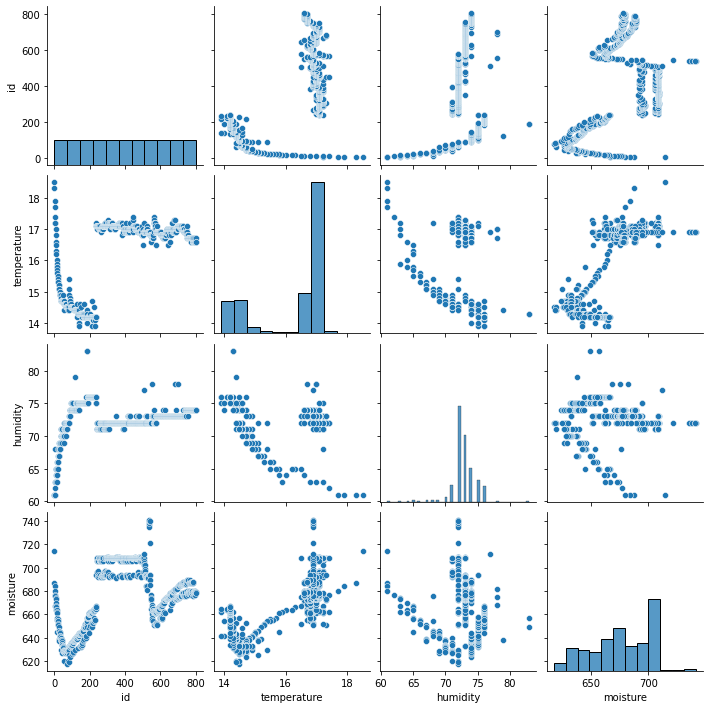

In [29]:
sns.pairplot(newb)

Se puede observar graficas de correlacciones entre las variables del dataset.

In [30]:
corr=newb.corr(method = 'pearson')
corr

,id,temperature,humidity,moisture
id,1.000000,0.656260,0.237448,0.421510
temperature,0.656260,1.000000,-0.352366,0.796028
humidity,0.237448,-0.352366,1.000000,-0.183779
moisture,0.421510,0.796028,-0.183779,1.000000


Se puede observar la tabla de correlacion de las caracteristicas de con respecto a la relacion que tiene cada una con las otras.

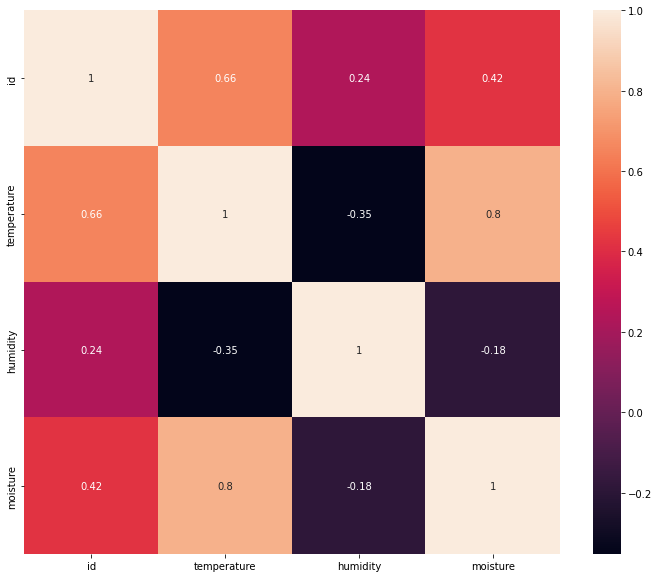

In [31]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True)
plt.show()

Existe bastante consenso a la hora de interpretar los valores del coeficiente de correlación de Pearson utilizando los siguientes criterios (y considerando los valores absolutos):

* Entre 0 y 0,10: correlación inexistente
* Entre 0,10 y 0,29: correlación débil
* Entre 0,30 y 0,50: correlación moderada
* Entre 0,50 y 1,00: correlación fuerte

FUENTE: https://www.cimec.es/coeficiente-correlacion-pearson/#:~:text=Cómo%20se%20interpreta%20el%20coeficiente%20de%20correlación%20de%20Pearson&text=Cuánto%20más%20se%20acerca%20a,tienen%20una%20correlación%20negativa%20perfecta.

##  Modelado


1. Seleccion de predictores (Xi) y target (Y) para analisis de regresion.

In [32]:
predictors = ['temperature', 'humidity']
target = 'moisture'

print("Xi = ", predictors,"\n Y = ", target)

Xi =  ['temperature', 'humidity'] 
 Y =  moisture


In [33]:
X = pd.get_dummies(newb[predictors], drop_first=True)
y = newb[target]

In [34]:
X

,temperature,humidity
0,18.5,61
1,18.3,61
2,17.9,61
3,17.7,61
4,17.2,63
...,...,...
795,16.6,74
796,16.6,74
797,16.7,74
798,16.6,74


In [35]:
y

0      714
1      687
2      684
3      680
4      667
      ... 
795    679
796    679
797    679
798    679
799    678
Name: moisture, Length: 800, dtype: int64

2. Particion de datos

In [36]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.3,random_state=1)

### Regresion lineal Multiple


1. Crear el modelo de regresion lineal multiple

In [37]:
from sklearn.linear_model import LinearRegression
model_newb = LinearRegression()

2. Entrenar el modelo 

In [38]:
model_newb.fit(train_X,train_y)

LinearRegression()

3. Precision del set entrenamiento

In [39]:
precision=model_newb.score(train_X,train_y)
print("La precisión del modelo es:",precision)

La precisión del modelo es: 0.6316943959892096


4.  Imprimir el coeficiente de los predictores

In [40]:
print(pd.DataFrame({'Predictors': X.columns,'Coefficient':model_newb.coef_})) 

    Predictors  Coefficient
0  temperature    19.101722
1     humidity     1.460993


5. Realizar una prediccion con el set de entrenamiento

In [41]:
pred_t=model_newb.predict(train_X)
#pred_t

6. Mostrar un resumen de margen de error de la regresion con la prediccion del set de entrenamiento.

In [42]:
!pip install dmba
from dmba import regressionSummary
regressionSummary(train_y, model_newb.predict(train_X))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 10.8 MB/s 
no display found. Using non-interactive Agg backend

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 15.8919
            Mean Absolute Error (MAE) : 13.2958
          Mean Percentage Error (MPE) : -0.0544
Mean Absolute Percentage Error (MAPE) : 1.9592


7. Realizar una prediccion con un nuevo testeo(set de prueba)

In [43]:
model_newb_pred= model_newb.predict(test_X)

8. Mostrar resultado de las predicciones

In [44]:
result = pd.DataFrame({'Predicted':model_newb_pred,'Actual': test_y, 
                       'Residual': test_y-model_newb_pred})

print(result.head(20))

      Predicted  Actual   Residual
8    673.438880     673  -0.438880
510  688.497986     702  13.502014
175  641.306315     649   7.693685
735  691.419971     686  -5.419971
242  690.857338     708  17.142662
764  687.599627     679  -8.599627
540  686.587814     694   7.412186
430  690.408158     692   1.591842
84   654.114887     625 -29.114887
642  691.869151     674 -17.869151
255  688.947165     708  19.052835
111  645.575839     638  -7.575839
289  692.318330     697   4.681670
349  692.318330     691  -1.318330
703  693.779323     675 -18.779323
521  691.869151     684  -7.869151
437  690.408158     708  17.591842
565  694.228502     652 -42.228502
224  642.767307     665  22.232693
371  694.228502     708  13.771498


9. Mostrar un resumen de margen de error de la regresion con la prediccion del set de prueba.

In [45]:
regressionSummary(test_y, model_newb_pred)


Regression statistics

                      Mean Error (ME) : -1.7400
       Root Mean Squared Error (RMSE) : 15.7218
            Mean Absolute Error (MAE) : 13.4817
          Mean Percentage Error (MPE) : -0.3179
Mean Absolute Percentage Error (MAPE) : 1.9947


10. Precision del set de prueba

In [46]:
precision=model_newb.score(test_X,test_y)
print("La precisión del modelo es:",precision)

La precisión del modelo es: 0.6675939459920497


### Vectores de Soporte Regresión

1. Crear el modelo de Vectores de Soporte Regresión

In [47]:
from sklearn import svm
svm_reg = svm.SVR(kernel='linear', C=1.0)

2. Entrenar el modelo

In [48]:
svm_reg.fit(train_X,train_y)

SVR(kernel='linear')

3. Precision del set entrenamiento

In [49]:
precision=svm_reg.score(train_X,train_y)
print("La precisión del modelo es:",precision)

La precisión del modelo es: 0.6281571478082


4. Realizar una prediccion con el set de entrenamiento

In [50]:
pred = svm_reg.predict(train_X)
#pred

5. Mostrar un resumen de margen de error de la regresion con la prediccion del set de entrenamiento.

In [51]:
!pip install dmba
from dmba import regressionSummary
regressionSummary(train_y,svm_reg.predict(train_X))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

Regression statistics

                      Mean Error (ME) : -0.5478
       Root Mean Squared Error (RMSE) : 15.9680
            Mean Absolute Error (MAE) : 13.1926
          Mean Percentage Error (MPE) : -0.1286
Mean Absolute Percentage Error (MAPE) : 1.9459


6. Realizar una prediccion con un nuevo testeo(set de prueba)

In [52]:
pred_y =svm_reg.predict(test_X)

7. Mostrar un resumen de margen de error de la regresion con la prediccion del set de prueba.

In [53]:
regressionSummary(test_y, pred_y)


Regression statistics

                      Mean Error (ME) : -2.2774
       Root Mean Squared Error (RMSE) : 15.7287
            Mean Absolute Error (MAE) : 13.3909
          Mean Percentage Error (MPE) : -0.3902
Mean Absolute Percentage Error (MAPE) : 1.9820


8. Precision del set de prueba

In [54]:
precision=svm_reg.score(test_X,test_y)
print("La precisión del modelo es:",precision)

La precisión del modelo es: 0.667304072505412


### Regresión Polinomial

1. Crear el modelo de regresion polinomial

In [55]:
 from sklearn.preprocessing import PolynomialFeatures
 model_newb = PolynomialFeatures(degree = 2) #se define el grado del polinomio

2. Se transforma las caracteristicas existentes en caracteristicas de mayor grado

In [56]:
train_X_poli = model_newb.fit_transform(train_X)
test_X_poli = model_newb.fit_transform(test_X)

3. Defino el algoritmo a utilizar


In [57]:
model_b = LinearRegression()

4. entreno el modelo


In [58]:
model_b.fit(train_X_poli,train_y)

LinearRegression()

5. Realizar una prediccion con el set de entrenamiento

In [59]:
pred_train_model_b= model_b.predict(train_X_poli)

6. 'Datos del modelo de regresion polinomial'


In [60]:
print('valor de la pendiente o coeficiente "a":')
print(model_b.coef_)

valor de la pendiente o coeficiente "a":
[  0.         199.61582488 118.00184093   0.90971351  -2.88321933
  -0.50084357]


In [61]:
print('valor de la interseccion o coeficiente "b":')
print(model_b.intercept_)

valor de la interseccion o coeficiente "b":
-5334.111089077678


7. Mostrar un resumen de margen de error de la regresion con la prediccion del set de entrenamiento.

In [62]:
 !pip install dmba
from dmba import regressionSummary
regressionSummary(train_y, model_b.predict(train_X_poli))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 14.6679
            Mean Absolute Error (MAE) : 11.9772
          Mean Percentage Error (MPE) : -0.0464
Mean Absolute Percentage Error (MAPE) : 1.7681


8. Realizar una prediccion con un nuevo testeo(set de prueba)

In [63]:
pred_test_model_b= model_b.predict(test_X_poli)

9. Mostrar un resumen de margen de error de la regresion con la prediccion del set de prueba.

In [64]:
regressionSummary(test_y, pred_test_model_b)


Regression statistics

                      Mean Error (ME) : -0.8989
       Root Mean Squared Error (RMSE) : 14.6590
            Mean Absolute Error (MAE) : 11.9129
          Mean Percentage Error (MPE) : -0.1836
Mean Absolute Percentage Error (MAPE) : 1.7647


10. Precision del algoritmo

In [65]:
precision=model_b.score(train_X_poli,train_y)
print("La precisión del modelo es:",precision)

La precisión del modelo es: 0.6862427914123781


In [66]:
precision=model_b.score(test_X_poli,test_y)
print("La precisión del modelo es:",precision)

La precisión del modelo es: 0.7110170466579633
